In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_wine

In [3]:
X, y =load_wine(return_X_y=True,as_frame=True)

In [4]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
X.shape, y.shape

((178, 13), (178,))

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [7]:
lda = LinearDiscriminantAnalysis()
X_train2 = lda.fit_transform(X_train,y_train)
X_test2 = lda.transform(X_test)

In [8]:
d1 = pd.DataFrame(X_train2,columns=['LDA1','LDA2'])
d1['target'] = y_train.values

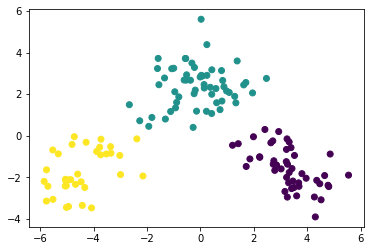

In [9]:
plt.scatter(d1['LDA1'],d1['LDA2'],c=d1['target'])

In [10]:
pca = PCA(n_components=2)
X_train3 =pca.fit_transform(X_train)
X_test3 =pca.transform(X_test)

In [11]:
d2 = pd.DataFrame(X_train3,columns=['PCA1','PCA2'])
d2['target'] = y_train.values

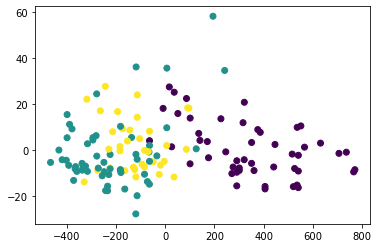

In [12]:
plt.scatter(d2['PCA1'],d2['PCA2'],c=d2['target'])

In [13]:
data = pd.read_csv('data/digit-recognizer/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [17]:
lda = LinearDiscriminantAnalysis()
X_train2 = lda.fit_transform(X_train,y_train)
X_test2 = lda.transform(X_test)

In [19]:
X_train2.shape

(33600, 9)

In [20]:
d1 = pd.DataFrame(X_train2,columns=['LDA1','LDA2','LDA3','LDA4','LDA5','LDA6','LDA7','LDA8','LDA9'])
d1['target'] = y_train.values

In [21]:
d1

,LDA1,LDA2,LDA3,LDA4,LDA5,LDA6,LDA7,LDA8,LDA9,target
0,-0.681810,0.131404,-1.571935,4.646231,2.099529,2.181623,-2.619716,4.337503,0.811238,5
1,-2.671018,-2.485308,-3.045572,-1.006919,-0.796525,-0.210335,1.055895,-1.433955,-0.385777,0
2,-1.750482,0.000851,-3.022317,0.813890,0.922746,1.003704,0.229525,0.287797,-0.286286,3
3,-4.252111,-3.205836,-2.444721,0.246976,-1.981294,-0.697439,0.183957,-1.127327,-0.450658,0
4,-1.259716,1.229896,-3.405378,0.150367,3.324933,2.869229,3.156439,-1.680957,0.265836,3
...,...,...,...,...,...,...,...,...,...,...
33595,-2.832604,0.616662,4.851686,-0.874167,0.144231,2.603564,-0.117531,-0.828966,-0.486317,6
33596,3.405557,-1.587583,-0.775860,-0.280741,0.098225,-0.326475,-0.418046,-1.813689,2.531157,9
33597,-0.043112,-0.389769,-1.413581,0.163789,-1.592178,-0.717245,-1.435835,-1.426773,-0.565421,2
33598,-0.485173,-2.150396,-1.968876,-1.818362,-1.949856,-0.904289,-1.088285,0.657064,1.747721,9


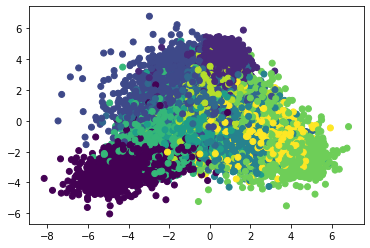

In [22]:
plt.scatter(d1['LDA1'],d1['LDA2'],c=d1['target'])